In [1]:
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.model_selection import train_test_split # used for splitting training and testing data
import seaborn as sns # Seaborn visualization library
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('USAadultdata.csv') # to import the train dataset into a variable

In [3]:
train.head()

ID  age          workclass  fnlwgt   education  education-num  \
0   1   39          State-gov   77516   Bachelors             13   
1   2   50   Self-emp-not-inc   83311   Bachelors             13   
2   3   38            Private  215646     HS-grad              9   
3   4   53            Private  234721        11th              7   
4   5   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  Income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [4]:
import pandas_profiling
pandas_profiling.ProfileReport(train) # to get a profiling report

In [5]:
train=train.drop(['ID','education'],axis=1)

In [6]:
train.shape

(32561, 14)

In [7]:
train['Income'] = train.apply(lambda row: 1 if '>50K'in row['Income'] else 0, axis=1)

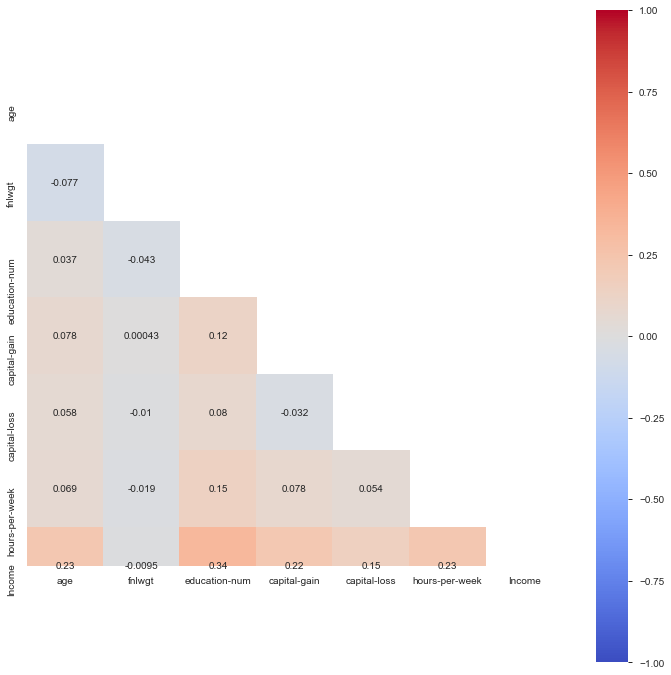

In [8]:
# to get a correlation plot of the dataset using seaborn library
corr = train.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,12))
sns.heatmap(
    corr, mask=mask,vmin=-1, vmax=1, center=0,cmap='coolwarm',annot=True,
    square=True
)

In [9]:
train = train.drop(['fnlwgt','capital-gain','capital-loss','native-country','occupation'], axis=1)

In [10]:
train['marital-status'].replace(to_replace=['Divorced', 'Married-AF-spouse', 
              'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married','Separated','Widowed'],
             value=['not married','married','married','married',
              'not married','not married','not married'], regex=True,inplace = True)

In [11]:
train = pd.get_dummies(train, columns=['workclass', 'marital-status', 'relationship', 'race', 'sex'])

In [12]:
train.head()

age  education-num  hours-per-week  Income  workclass_ ?  \
0   39             13              40       0             0   
1   50             13              13       0             0   
2   38              9              40       0             0   
3   53              7              40       0             0   
4   28             13              40       0             0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   
1                       0                     0                        0   
2                       0                     0                        0   
3                       0                     0                        0   
4                       0                     0                        0   

   workclass_ Private  workclass_ Self-emp-inc  ...  relationship_ Own-child  \
0                   0                        0  ...                        0   
1                   0                        0  ...                        0   
2                   1                        0  ...                        0   
3                   1                        0  ...                        0   
4                   1                        0  ...                        0   

   relationship_ Unmarried  relationship_ Wife  race_ Amer-Indian-Eskimo  \
0                        0                   0                         0   
1                        0                   0                         0   
2                        0                   0                         0   
3                        0                   0                         0   
4                        0                   1                         0   

   race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0                         0            0            0            1   
1                         0            0            0            1   
2                         0            0            0            1   
3                         0            1            0            0   
4                         0            1            0            0   

   sex_ Female  sex_ Male  
0            0          1  
1            0          1  
2            0          1  
3            0          1  
4            1          0  

[5 rows x 28 columns]

In [13]:
y=train['Income']
X=train.drop(['Income'],axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=7,
                                   random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[5582,  577],
       [ 822, 1160]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8281537894607542